##### Imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data ---twitter csv
tweets_df = pd.read_csv('twitter.csv')
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [5]:
tweets_df.drop(['id'],axis=1,inplace=True)
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


##### Data exploration
***

In [6]:
#no missing values
tweets_df.isnull().sum()

label    0
tweet    0
dtype: int64

<AxesSubplot:>

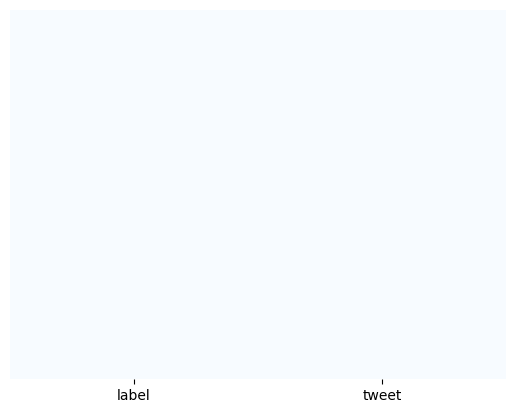

In [7]:
sns.heatmap(tweets_df.isnull(), yticklabels=False,cbar = False,cmap='Blues')

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

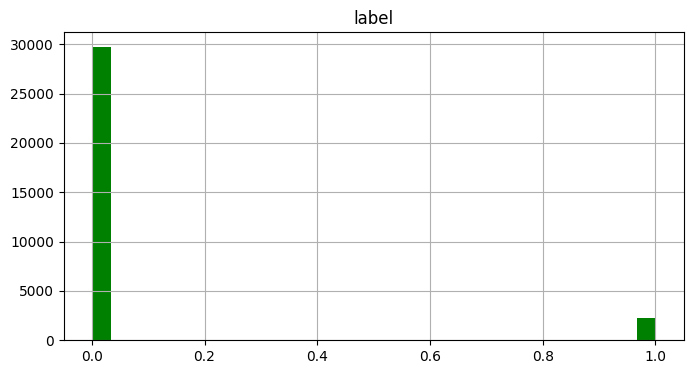

In [8]:
#plot the labels
tweets_df.hist(bins = 30,figsize=(8,4),color = 'green')
#a lot more 0 values than 1 --->unbalanced data

<AxesSubplot:ylabel='count'>

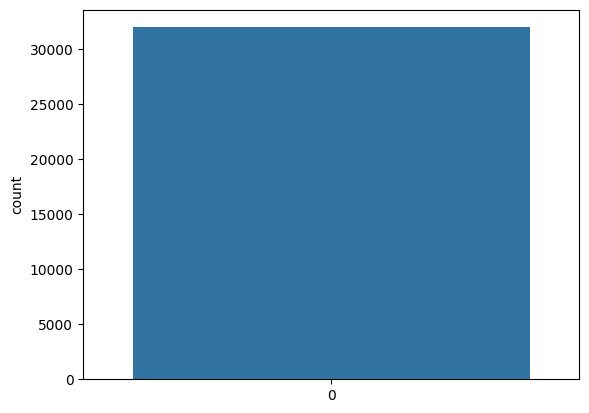

In [9]:
sns.countplot(tweets_df['label'],label = 'Count')

In [10]:
#extra features 
# how many characters per tweet
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [11]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [12]:
min(tweets_df['length'])

11

In [13]:
#view shortest and longest message
print('Shortest tweet is:',tweets_df.loc[tweets_df['length'] == min(tweets_df['length'])]['tweet'].values[0])
print('Longest tweet is:',tweets_df.loc[tweets_df['length'] == max(tweets_df['length'])]['tweet'].values[0])


Shortest tweet is: i love you 
Longest tweet is:  @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ðððððððððððð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð±ð±ð¤ð¤ð±ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ðððððððâ¦


In [14]:
#view the tweet with average length
tweets_df['length'].mean()
#but length isn't float so 

84.73962830861649

In [15]:
tweets_df[tweets_df['length'] == 85]

,label,tweet,length
115,0,â #under the spell of brexit referendum - c...,85
242,0,make today count! #mondaymotivation #livelifet...,85
384,0,"dream palace, can we move in already? #stellar...",85
573,0,@user monkeys are also declared as vermin. no ...,85
634,0,save thousands $$ free search x logins x broke...,85
...,...,...,...
31393,0,#flagday2016 #flag #day #2016 #(30 #photos) ...,85
31468,0,jts88troxy theater jts88@user ð #love #si...,85
31542,0,stretched to the limit and still #waiting pati...,85
31773,0,this reminds me of this. i am love these two...,85


##### WordCloud
***

In [15]:
#create two dataframes 
#with all the positive and all the negative tweets
positive_tweets = tweets_df[tweets_df['label']==0]
positive_tweets

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [16]:
negative_tweets = tweets_df[tweets_df['label']==1]
negative_tweets

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [17]:
#combine all the tweets into a massive string 
#use a wordcloud
#convert them to a list 
sentences = tweets_df['tweet'].to_list()
len(sentences)
sentences[0:3]

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty']

In [18]:
#join them all together
joined_sentences = " ".join(sentences)

In [19]:
joined_sentences[0:3]

' @u'

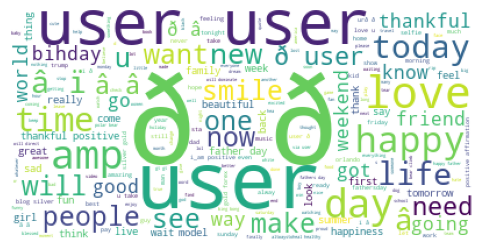

In [20]:
#import the libraries for wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
plt.figure(figsize=(6,6))
wordcloud = WordCloud(background_color='white').generate(joined_sentences)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [21]:
#plot the wordcloud only for the negative dataframe 
negative_sentences = " ".join(x for x in negative_tweets['tweet'])

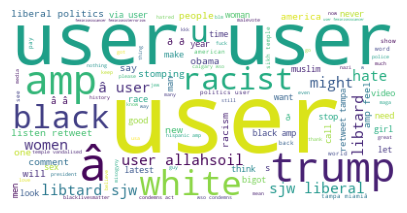

In [22]:
wordcloud_neg = WordCloud(background_color='white').generate(negative_sentences)
plt.figure(figsize=(5,5))
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.show()

##### Data cleaning 
***

In [23]:
#remove punctuations, stopwords etc.
#stopwords: common words like a,I,the
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
#testing how it works
test_text = '$I love AI & Machine Learning !!'


In [25]:
test_pun_removed = [x for x in test_text if x not in string.punctuation]
test_pun_removed
#rejoin them 
test_pun_removed_join = " ".join(test_pun_removed)
test_pun_removed_join

'I   l o v e   A I     M a c h i n e   L e a r n i n g  '

In [27]:
#remove stopwords -->common words like he,she , them,feel
!pip install nltk
import nltk #natural language tool kit 
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english') #stopwords thath I have in the english language


You are using pip version 19.0.3, however version 22.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FSU_EYDAP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
testing2 = 'I enjoy coding, programming and artificial intelligence'
#testing2_clean = [char for char in testing2.split()] ---> split the sentence into words
#char.lower()---> convert everything into lower case 
testing2_clean = [char for char in testing2.split() if char.lower() not in stopwords.words('english')]
testing2_clean
#got rid of the I ,and

['enjoy', 'coding,', 'programming', 'artificial', 'intelligence']

##### Practice 4 that creates a pipeline to remove stopwords & punctuations 

In [36]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'
#firstly remove punctuations 
challenge = [x for x in mini_challenge if x not in string.punctuation]
challenge

['H',
 'e',
 'r',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'm',
 'i',
 'n',
 'i',
 ' ',
 'c',
 'h',
 'a',
 'l',
 'l',
 'e',
 'n',
 'g',
 'e',
 ' ',
 't',
 'h',
 'a',
 't',
 ' ',
 'w',
 'i',
 'l',
 'l',
 ' ',
 't',
 'e',
 'a',
 'c',
 'h',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'h',
 'o',
 'w',
 ' ',
 't',
 'o',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 's',
 't',
 'o',
 'p',
 'w',
 'o',
 'r',
 'd',
 's',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's']

In [37]:
challenge = "".join(challenge)
challenge

'Here is a mini challenge that will teach you how to remove stopwords and punctuations'

In [38]:
#Next remove the stopwords ---> we care about words here so challenge.split()
challenge = [x for x in challenge.split() if x.lower() not in stopwords.words('english')]
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

##### Count Vectorization - Tokenization

In [45]:
#convert the text left into numbers (tokens)
#take every single unique word 
#number for how frequent it appeared in the text
#import the library
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This paper is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)
#to get all the unique words
print(vectorizer.get_feature_names_out())

['and' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [46]:
print(X.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]]


#### Practice 5

In [49]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
vectorizer_challenge = CountVectorizer()
X1 = vectorizer_challenge.fit_transform(mini_challenge)
print(vectorizer_challenge.get_feature_names_out())
print(X1.toarray())

['hello' 'world']
[[1 1]
 [2 1]
 [1 3]]


##### Create a pipeline to remove puntuations, stopwords & perform count vectorization all at once

In [50]:
#combine them all together
#create a function
def message_cleaning(message):
    message_removed = [x for x in message if x not in string.punctuation]
    message_removed_join = ''.join(message_removed)
    message_removed_join_clean = [x for x in message_removed_join.split() if x.lower() not in stopwords.words('english')]
    return message_removed_join_clean


In [51]:
tweets_clean = tweets_df['tweet'].apply(message_cleaning)
tweets_clean

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
31957    [ate, user, isz, youuuðððððð...
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [user, sikh, temple, vandalised, calgary, wso,...
31961                                [thank, user, follow]
Name: tweet, Length: 31962, dtype: object

In [57]:
print('Original version: ', tweets_df['tweet'][5])
print('Cleaned version: ',tweets_clean[5])

Original version:  [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
Cleaned version:  ['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [58]:
########### all at once 
# perform count vectorization
#pass the function used to make sure the size of the array won't be huge abd there won't be any mistakes
vectorizer = CountVectorizer(analyzer= message_cleaning,dtype=np.uint8)
tweets_vect = vectorizer.fit_transform(tweets_df['tweet'])


In [59]:
print(vectorizer.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [60]:
print(tweets_vect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [62]:
tweets_vect.shape

(31962, 47386)

In [64]:
#convert in into a DataFrame
Final = pd.DataFrame(tweets_vect.toarray())

In [65]:
Final.head(3)

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y = tweets_df['label']
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

##### Naive Bayes

Classification technique      
For example to classify clients if they are eligible to retire or not           
Features: age,salary ---> explanation and probabilities in workspace       

##### Train and evaluate a Naive Bayes model

In [67]:
#check sizes
Final.shape

(31962, 47386)

In [68]:
y.shape

(31962,)

In [69]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Final,y,test_size=0.2)

In [71]:
from sklearn.naive_bayes import MultinomialNB
#train the model
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

<AxesSubplot:>

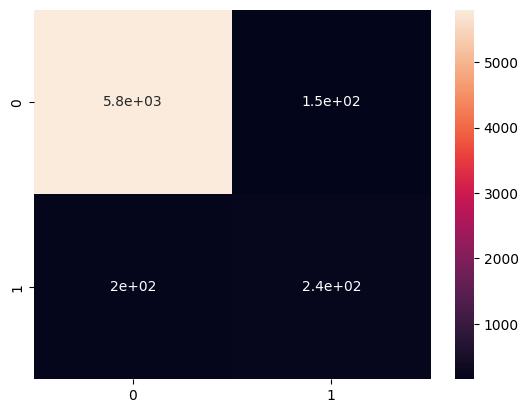

In [72]:
#evaluate it using a confusion matrix for classification problems
from sklearn.metrics import confusion_matrix , classification_report
y_predict = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot = True)

In [73]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5954
           1       0.61      0.54      0.57       439

    accuracy                           0.94      6393
   macro avg       0.79      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393

